In [36]:
import numpy
from matplotlib import pyplot
%matplotlib inline

Imported numpy and matplot lib,
%matplotlib inline tells IPython to show the plots inline

In [37]:
T = 100.0
dt = 0.01
N = int(T/dt) + 1
t = numpy.linspace(0.0, T, N)

T is the final time, dt is the time step, t is an array with all the values of time that make up the grid

numpy.arange([0.0], T,[dt]) can be used in place of numpy.linspace(0.0,T,N)

In [38]:
#initial conditions for Euler's method
z0 = 100.0 #altitude
b0 = 10.0 #upward velocity resulting from gust
zt = 100.0
g = 9.81

#all numbers are floats

u = numpy.array([z0, b0])

#initialize an aaray to hold the changing elevation values
z = numpy.zeros(N)
z[0] = z0 #initial value of the first element of the solution vector

In [39]:
#time-loop using Euler's method
for n in range(1,N):
    u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)]) #u(n+1) = un + dt*f(un)
    z[n] = u[0] #setting inital condition

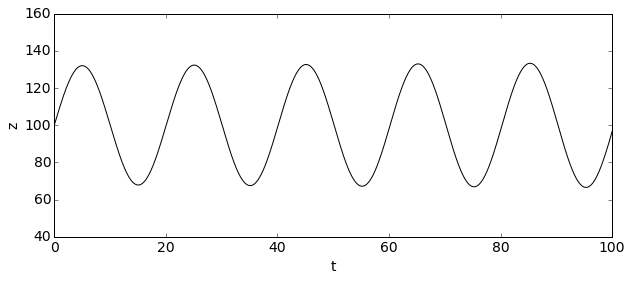

In [40]:
pyplot.figure(figsize=(10,4))                 #set the plot size
pyplot.ylim(40,160)                           #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t', fontsize = 14)             #x label and font size
pyplot.ylabel('z', fontsize = 14)             #y label and font size
pyplot.plot(t,z, 'k')

If there is a larger gust, the amplitude is greater.  With a smaller gust there amplitude is smaller.  In both cases the period of the waves are the same.  With no gust, a straight line is given, which makes sense.

In [41]:
#Exact solutions
z_exact = b0 * (zt/g)**.5 * numpy.sin((g/zt)**.5 * t) + (z0-zt) * numpy.cos((g/zt)**.5 * t) + zt

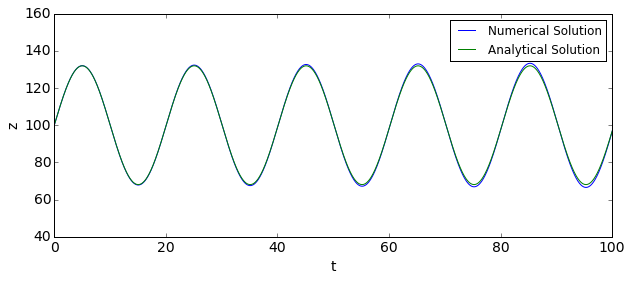

In [42]:
#plot both on same axis to compare numerical and exact solution
pyplot.figure(figsize=(10,4))
pyplot.ylim(40,160)
pyplot.tick_params(axis='both',labelsize=14)
pyplot.xlabel('t', fontsize=14)
pyplot.ylabel('z', fontsize=14)
pyplot.plot(t,z)
pyplot.plot(t,z_exact)
pyplot.legend(['Numerical Solution','Analytical Solution']);

In [43]:
#time-increment array
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001, 0.0001])

#array that will contain solution of each grid
z_values = numpy.empty_like(dt_values, dtype = numpy.ndarray)

for i, dt in enumerate(dt_values):
    N = int(T/dt) + 1 #number of time steps
    ### discretize the time using numpy.linspace() ###
    t = numpy.linspace(0.0,T,N)
    
    #initial conditions
    u = numpy.array([z0, b0])
    z = numpy.empty_like(t)
    z[0] = z0
    
    #time loop - Euler method
    for n in range(1,N):
        ### compute next solution using Euler method ###
        u = u + dt * numpy.array([u[1], g*(1-u[0]/zt)])
        z[n] = u[0] #store the elevation at time-step n+1
    
    z_values[i] = z.copy() #store the total elevation calculation grid i

In [47]:
def get_error(z, dt):
    """Returns the error relative to analytical solution using L-1 norm.
    
    Parameters
    ----------
    z : array of float
        numerical solution.
    dt : float
        time increment.
        
    Returns
    -------
    err : float
        L_{1} norm of the error with respect to the exact solution
    """
    N = len(z)
    t = numpy.linspace(0.0, T, N)
    
    z_exact = b0 * (zt/g)**.5 * numpy.sin((g/zt)**.5*t) + (z0-zt) * numpy.cos((g/zt)**.5 * t) + zt
    
    return dt * numpy.sum(numpy.abs(z-z_exact))


In [48]:
#Iterate through each delta t value and calculate the corresponding error
error_values = numpy.empty_like(dt_values)

for i, dt in enumerate(dt_values):
    ### call the function get error() ###
    error_values[i] = get_error(z_values[i], dt)
    #If the method is convergent, then the error should get smaller as delta t gets smaller

(0.0001, 0.10000000000000001, 0.10000000000000001, 1000.0)

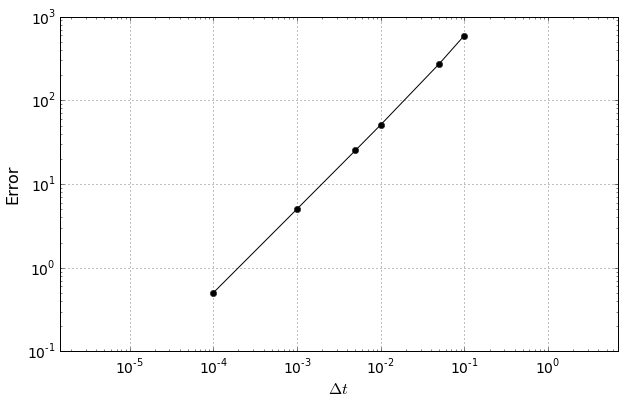

In [49]:
#use loglog plot for plot delta t vs the error.  
#Loglog plots are almost always used to asses the errors of a numerical scheme graphically

pyplot.figure(figsize=(10,6))
pyplot.tick_params(axis='both', labelsize=14) #increase tick font size
pyplot.grid(True)                             #turn on grid lines
pyplot.xlabel('$\Delta t$', fontsize=16)      #xlabel with delta t symbol
pyplot.ylabel('Error', fontsize=16)           #ylabel
pyplot.loglog(dt_values, error_values, 'ko-') #log-log plot
pyplot.axis('equal')                          #make axes scale equally

